In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense,Conv2D ,GlobalMaxPooling2D, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from keras import backend as K

plt.style.use('dark_background')

In [146]:
path = "cats_and_dogs/"
training_data_dir = path + "train" 
validation_data_dir = path + "validation" 
test_data_dir = path + "test" 

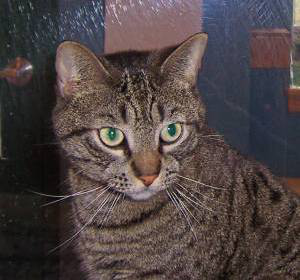

In [147]:
im = Image.open( "cats_and_dogs/train/cats/cat.1.jpg")
im

In [148]:
img = np.asarray(im)
print(img.shape)
img = img / 255
print(img.shape)
h_dim = np.shape(img)[0]
w_dim = np.shape(img)[1]
num_channel = np.shape(img)[2]
img = img.reshape(1, h_dim, w_dim, num_channel)
print(img.shape)

(280, 300, 3)
(280, 300, 3)
(1, 280, 300, 3)


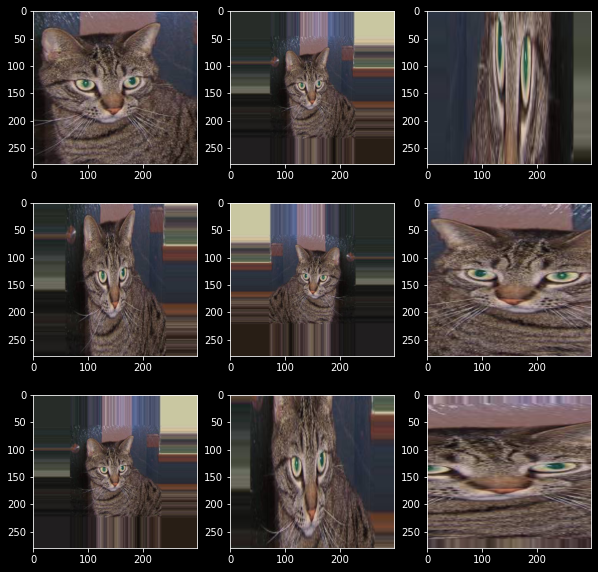

In [149]:
batch_size=9
#ImageDataGenerator nos genera imagenes de nuestro gato editado 9 veces de diferente forma 

datagen = ImageDataGenerator(
        rotation_range=0,
        shear_range=0,
        zoom_range=1,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=None)

datagen.fit(img)
plt.figure(figsize=(10,10)) 

for x,img_batch in enumerate(datagen.flow(img, batch_size=9)):
    for img in img_batch:
        plt.subplot(330 + 1 + x)
        plt.imshow(img)
        x+=1    
    if x >= batch_size:
        break
plt.show()


In [150]:
# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=1,
    horizontal_flip=True,
    vertical_flip=True)

validation_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=1,
    horizontal_flip=True,
    vertical_flip=True)

test_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=1,
    horizontal_flip=True,
    vertical_flip=True)

In [151]:
# Data preparation

#Para poder usar el flow_from_directory, necesitamos tener las carpetas ordenadas
#por ejemplo la carpeta de train con una carpeta de imagenes para cada clase

training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(200, 200),
    batch_size=30,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(200, 200),
    batch_size=30,
    class_mode="binary") #"categorical" para más de dos clases 
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(200, 200),
    batch_size=1,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [132]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(200,200,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 200, 200, 16)      3904      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 100, 100, 16)      20752     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 120)               4800120   
_________________________________________________________________
dropout_8 (Dropout)          (None, 120)              

In [133]:
model.compile(loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['acc'])


In [134]:
history = model.fit_generator( 
    training_generator, 
    epochs=3, 
    validation_data=validation_generator, 
    verbose=1)

Epoch 1/3
67/67 [==============================] - 137s 2s/step - loss: 1.2505 - acc: 0.4930 - val_loss: 0.6931 - val_acc: 0.5020
Epoch 2/3
67/67 [==============================] - 155s 2s/step - loss: 0.7654 - acc: 0.4930 - val_loss: 0.6937 - val_acc: 0.4930
Epoch 3/3
67/67 [==============================] - 184s 3s/step - loss: 0.6938 - acc: 0.5085 - val_loss: 0.6930 - val_acc: 0.5240


In [135]:
history.history

{'loss': [1.2532833102345466, 0.7656962892413139, 0.6938427990674972],
 'acc': [0.493, 0.493, 0.5085],
 'val_loss': [0.6931212421725778, 0.6936571475337533, 0.6929721551782945],
 'val_acc': [0.502, 0.493, 0.524]}

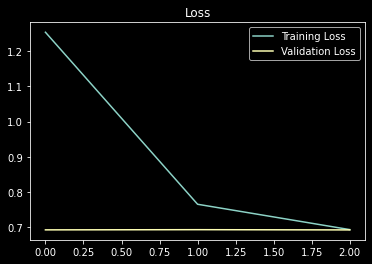

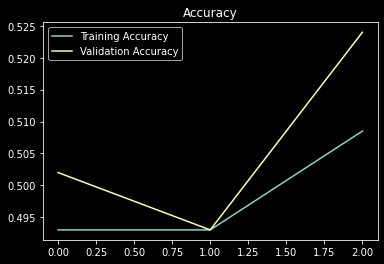

In [137]:
# Ejemplo 2 de gráficas 

history = model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)
#lo que buscamos en estas graficas es ver una grafica similar a la de la presentación


In [142]:
history

{'loss': [1.2532833102345466, 0.7656962892413139, 0.6938427990674972],
 'acc': [0.493, 0.493, 0.5085],
 'val_loss': [0.6931212421725778, 0.6936571475337533, 0.6929721551782945],
 'val_acc': [0.502, 0.493, 0.524]}

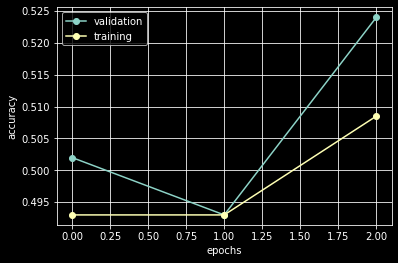

In [143]:
plt.plot(history['val_acc'],'-o',label='validation')
plt.plot(history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

In [152]:
model.save_weights('red_neuronal_entrenada.h5')